In [26]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [27]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [28]:
IMAGE_SIZE = [224, 224]

train_path = '../input/tomatoleaf/tomato/train'
valid_path = '../input/tomatoleaf/tomato/val'

In [29]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [30]:
for layer in inception.layers:
    layer.trainable = False

In [31]:
folders = glob('../input/tomatoleaf/tomato/train/*')

In [32]:
len(folders)

10

In [33]:
x = Flatten()(inception.output)

In [34]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [35]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [36]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [38]:
training_set = train_datagen.flow_from_directory('../input/tomatoleaf/tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [39]:
test_set = test_datagen.flow_from_directory('../input/tomatoleaf/tomato/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1000 images belonging to 10 classes.


In [40]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
313/313 [==============================] - 122s 378ms/step - loss: 6.5010 - accuracy: 0.5272 - val_loss: 2.7439 - val_accuracy: 0.6800
Epoch 2/10
313/313 [==============================] - 118s 375ms/step - loss: 1.7404 - accuracy: 0.7687 - val_loss: 2.1343 - val_accuracy: 0.7630
Epoch 3/10
313/313 [==============================] - 117s 375ms/step - loss: 1.4974 - accuracy: 0.8156 - val_loss: 3.2602 - val_accuracy: 0.7180
Epoch 4/10
313/313 [==============================] - 117s 373ms/step - loss: 1.8309 - accuracy: 0.8189 - val_loss: 2.7364 - val_accuracy: 0.7670
Epoch 5/10
313/313 [==============================] - 118s 376ms/step - loss: 1.7763 - accuracy: 0.8232 - val_loss: 2.7448 - val_accuracy: 0.8010
Epoch 6/10
313/313 [==============================] - 117s 374ms/step - loss: 1.5917 - accuracy: 0.8495 - val_loss: 3.3340 - val_accuracy: 0.7730
Epoch 7/10
313/313 [==============================] - 117s 373ms/step - loss: 1.5503 - accuracy: 0.8648 - val_loss: 3.9295 -

In [41]:
import matplotlib.pyplot as plt

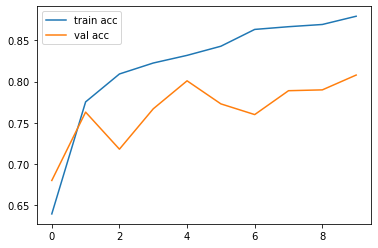

<Figure size 432x288 with 0 Axes>

In [42]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [43]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [44]:
y_pred = model.predict(test_set)

In [45]:
y_pred

array([[2.39979750e-27, 3.30519142e-05, 9.99966979e-01, ...,
        2.56216894e-23, 0.00000000e+00, 0.00000000e+00],
       [2.19843868e-28, 1.95617431e-21, 1.27481635e-14, ...,
        1.04220468e-33, 4.78855767e-18, 0.00000000e+00],
       [0.00000000e+00, 1.95555075e-33, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.48844202e-26, 0.00000000e+00, ...,
        1.97336631e-30, 0.00000000e+00, 4.31123771e-27],
       [1.58114112e-11, 7.18325627e-13, 8.72841279e-15, ...,
        0.00000000e+00, 9.99999642e-01, 3.78152766e-21],
       [6.48239206e-30, 5.71295961e-19, 2.49343999e-02, ...,
        1.36984909e-28, 3.43213856e-07, 0.00000000e+00]], dtype=float32)

In [46]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [47]:
y_pred

array([2, 3, 2, 1, 0, 9, 3, 1, 1, 7, 6, 6, 5, 2, 7, 3, 3, 0, 1, 5, 8, 8,
       1, 1, 0, 5, 5, 8, 3, 4, 5, 0, 6, 2, 5, 9, 5, 9, 0, 3, 5, 7, 2, 5,
       3, 5, 5, 6, 3, 5, 4, 2, 2, 3, 0, 8, 2, 6, 8, 8, 9, 7, 0, 3, 0, 0,
       2, 4, 7, 2, 2, 7, 0, 8, 7, 2, 2, 9, 1, 3, 0, 7, 1, 3, 2, 8, 4, 5,
       8, 9, 2, 0, 2, 8, 4, 9, 3, 6, 9, 7, 2, 9, 7, 7, 0, 8, 2, 8, 8, 6,
       7, 2, 8, 5, 0, 4, 4, 6, 6, 7, 2, 2, 8, 2, 3, 8, 2, 8, 1, 0, 9, 0,
       4, 7, 3, 4, 8, 0, 0, 2, 4, 8, 6, 0, 2, 0, 6, 7, 2, 0, 0, 3, 5, 8,
       9, 4, 6, 5, 4, 8, 2, 0, 0, 9, 1, 3, 0, 6, 2, 8, 6, 2, 1, 5, 2, 2,
       5, 9, 2, 6, 0, 1, 1, 1, 3, 3, 6, 8, 3, 7, 7, 7, 1, 3, 5, 2, 5, 8,
       7, 1, 9, 0, 7, 6, 7, 2, 8, 0, 2, 2, 8, 7, 6, 8, 0, 7, 0, 5, 5, 3,
       8, 5, 7, 8, 6, 3, 7, 5, 0, 5, 1, 2, 6, 4, 8, 7, 7, 8, 7, 4, 2, 7,
       3, 8, 7, 4, 4, 4, 7, 8, 2, 7, 7, 2, 8, 2, 0, 4, 8, 9, 6, 7, 0, 0,
       8, 2, 1, 0, 3, 5, 2, 8, 0, 0, 5, 0, 1, 0, 0, 8, 7, 6, 2, 0, 4, 5,
       3, 2, 5, 1, 1, 8, 6, 6, 0, 8, 2, 7, 2, 0, 9,

In [48]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [51]:
model=load_model('./model_inception.h5')

In [53]:
img=image.load_img('../input/tomatoleaf/tomato/val/Tomato___Tomato_mosaic_virus/01b32f27-2b9b-4961-805b-8066bf4d90f1___PSU_CG 2417.JPG',target_size=(224,224))

In [54]:
x=image.img_to_array(img)
x

array([[[181., 160., 177.],
        [184., 163., 180.],
        [133., 112., 129.],
        ...,
        [162., 145., 164.],
        [160., 143., 162.],
        [143., 126., 145.]],

       [[128., 107., 124.],
        [137., 116., 133.],
        [138., 117., 134.],
        ...,
        [168., 151., 170.],
        [173., 156., 175.],
        [155., 138., 157.]],

       [[160., 139., 156.],
        [197., 176., 193.],
        [138., 117., 134.],
        ...,
        [152., 135., 154.],
        [144., 127., 146.],
        [156., 139., 158.]],

       ...,

       [[203., 186., 202.],
        [191., 174., 190.],
        [205., 188., 204.],
        ...,
        [187., 170., 186.],
        [152., 135., 151.],
        [195., 178., 194.]],

       [[183., 166., 182.],
        [191., 174., 190.],
        [184., 167., 183.],
        ...,
        [189., 172., 188.],
        [169., 152., 168.],
        [212., 195., 211.]],

       [[191., 174., 190.],
        [229., 212., 228.],
        [136., 1

In [55]:
x.shape

(224, 224, 3)

In [56]:
x=x/255

In [57]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [60]:
model.predict(img_data)